# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [1]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('../input/motorcycle-parts/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card




**Find the total sales for each warehouse** 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [2]:
#the warehouses with the highest amount of total sales according to client type
warehouse_highest_salesType= df.groupby(['warehouse','client_type'])[['total']].sum()
warehouse_highest_salesType



total
warehouse client_type          
Central   Retail       63126.12
          Wholesale    78856.76
North     Retail       42137.36
          Wholesale    58066.27
West      Retail       24207.19
          Wholesale    22719.30

In [3]:
#the warehouses with the highest amount of total sales
warehouse_highest_sales= df.groupby(['warehouse'])[['total']].sum()
warehouse_highest_sales

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


<AxesSubplot:xlabel='warehouse'>

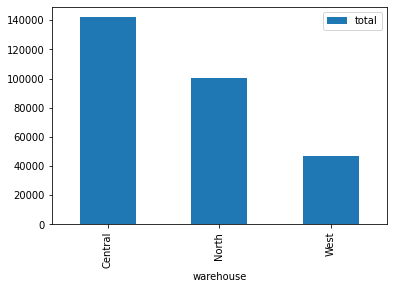

In [4]:
warehouse_highest_sales.plot(kind='bar')

**Which of the Client Type sells more quantity?**

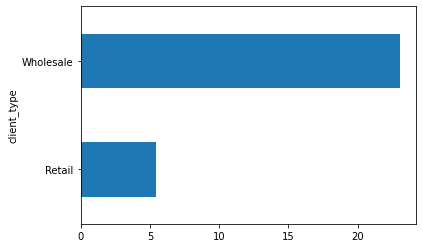

In [5]:
import matplotlib.pyplot as plt

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

**_the client type that makes more salesjudged by the average purchase value _**

In [6]:
#average purchase value by client type
avgupurtotal_client=df.groupby('client_type')[['total']].mean()
avgupurtotal_client.head()


,total
client_type,
Retail,167.058929
Wholesale,709.521467


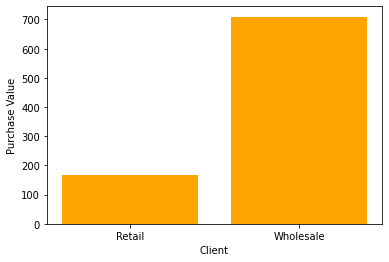

In [7]:
#a bar horizontal chart that shows the purchase value by each client type
fig, ax=plt.subplots()
ax.bar(avgupurtotal_client.index,avgupurtotal_client['total'], color='orange')
ax.set_xlabel('Client')
ax.set_ylabel('Purchase Value')
plt.show()

**What are the total sales for each payment method?**

In [8]:
#total sales for each payment method
Totalsales_eachPayment= df.groupby('payment')[['total']].sum()
Totalsales_eachPayment

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


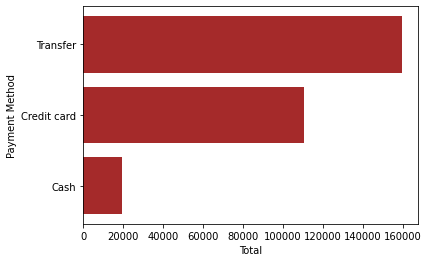

In [9]:
fig, ax=plt.subplots()
ax.barh(Totalsales_eachPayment.index,Totalsales_eachPayment['total'], color='brown')
ax.set_xlabel('Total')
ax.set_ylabel('Payment Method')
plt.show()

**What is the average unit price for each product line?**

In [10]:
#the average unit price for each product line
avgunitprice_eachpl=df.groupby('product_line')[['unit_price']].mean()
avgunitprice_eachpl

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


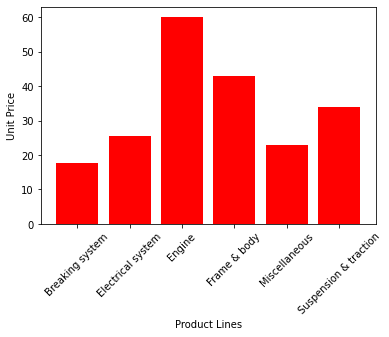

In [11]:
fig, ax=plt.subplots()
ax.bar(avgunitprice_eachpl.index,avgunitprice_eachpl['unit_price'], color='red')
ax.set_xticklabels(avgunitprice_eachpl.index, rotation=45)
ax.set_xlabel('Product Lines')
ax.set_ylabel('Unit Price')
plt.show()

**Total purchase value by product line**

In [12]:
#Which Product line makes more money
TotalProductLine_value= df.groupby('product_line')[['total']].sum()
TotalProductLine_value

,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


**Summary and Remarks**

1.	The Central Warehouse is doing better in respect to the sales they made.
2.	In all the warehouses except the West, wholesale unit is doing better than the retail unit.However, 	generally, the wholesale client type is really pulling weight that the retail.
3.	The most efficient and commonly used mode of payment is the transfer, followed by Credit cards.
4. 	Although the Engine product line has the highest unit price, the frame and body has the highest purchase value.
